In [1]:
library(Seurat)
library(tidyverse)
# library(SeuratWrappers)
library(future)
library(ggplot2)
library(SeuratObject)
library(viridis)
# library(ggpubr)
library(scales)
library(presto)
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)

Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.4.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘tidyr’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘purrr’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘stringr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”

In [2]:
plot_dir <- file.path('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/plots', 'harmony_2.png')

#  Load Data

In [2]:
# obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/scrna_integrated_harmony_final.rds')
obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/harmony_integrated_adult_final.rds')
obj

An object of class Seurat 
74637 features across 358244 samples within 2 assays 
Active assay: SCT (36031 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [3]:
obj@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.1,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,3,5,33,36,31,31,31,51,49,49
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,8,10,6,20,18,21,19,18,32,32
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,1,4,3,2,1,3,0,25,18,18
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,3,5,37,19,21,20,32,35,58,58
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,1,4,3,2,1,3,0,25,18,18
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGAACAGTGTCATC-1,PRJNA1125010,2965,1417,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,8.5666105,singlet,⋯,16,23,34,35,37,39,39,41,42,42


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



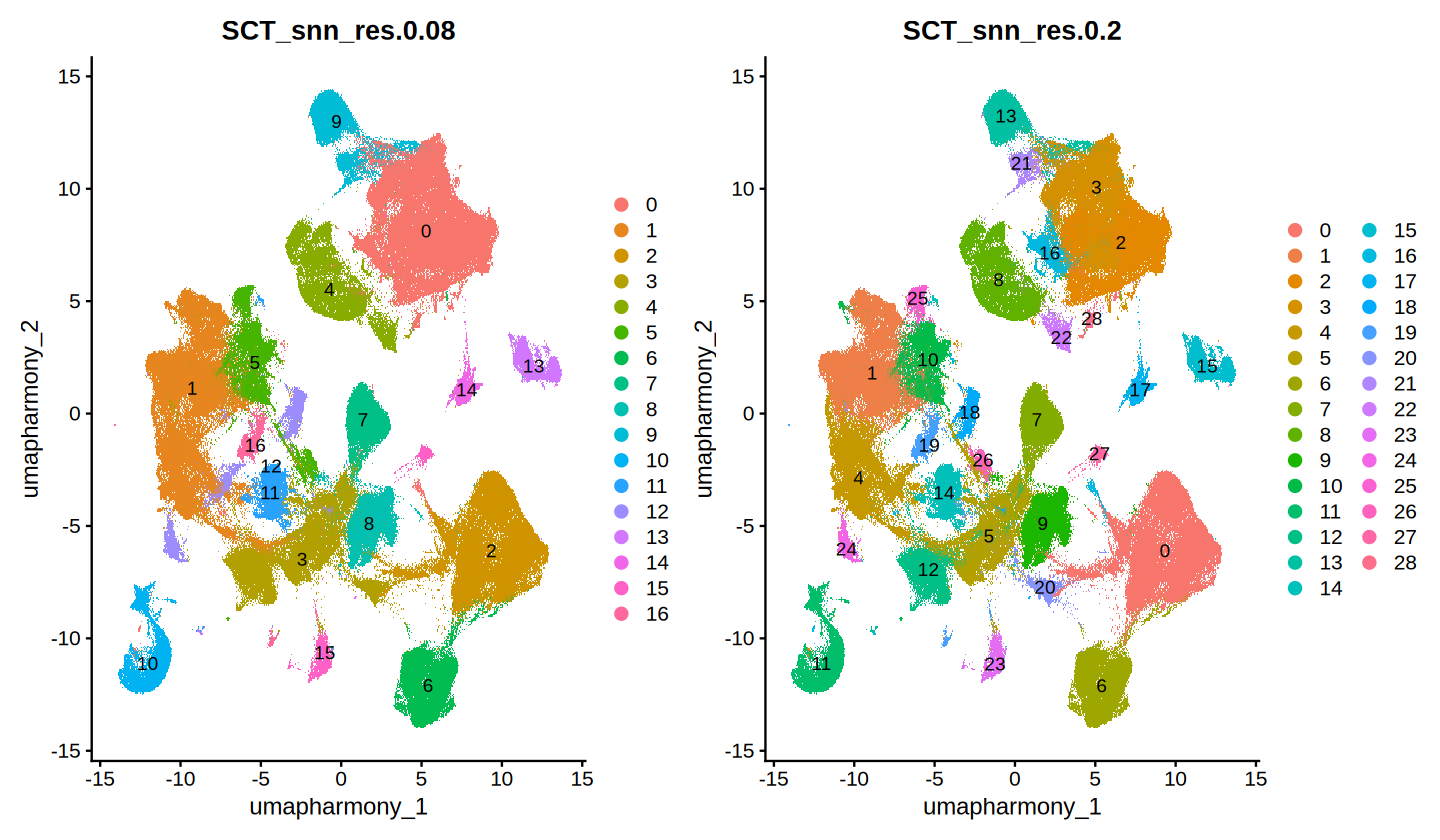

In [4]:
options(repr.plot.width = 12)
p1 <- DimPlot(obj, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08', label = TRUE)
p2 <- DimPlot(obj, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.2', label = TRUE)
p1 | p2

In [5]:
Idents(obj) <- "SCT_snn_res.0.2"

In [7]:
# Prepare the SCT assay for DE analysis
# This is required when using multiple SCT models
# obj <- PrepSCTFindMarkers(obj, assay = "SCT", verbose = TRUE)

In [6]:
# Find all markers for all clusters
all_markers <- FindAllMarkers(
  object = obj,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28



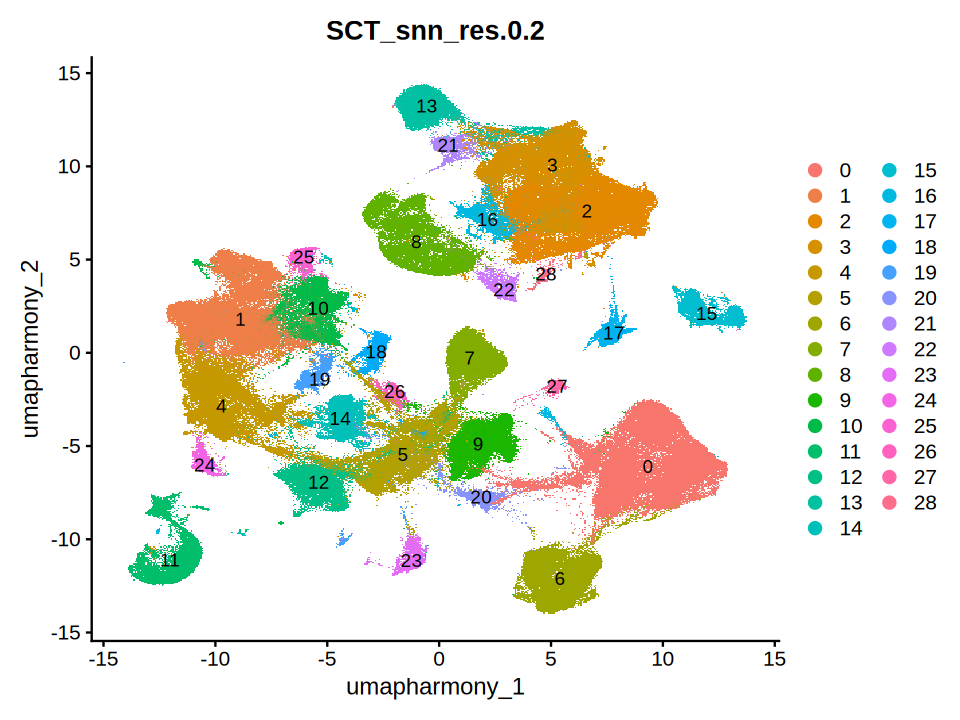

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)
p2

In [7]:
cluster0 <- all_markers %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1 <- all_markers %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2 <- all_markers %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3 <- all_markers %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4 <- all_markers %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5 <- all_markers %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6 <- all_markers %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7 <- all_markers %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8 <- all_markers %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))
cluster9 <- all_markers %>% filter(cluster == 9) %>% arrange(desc(avg_log2FC))
cluster10 <- all_markers %>% filter(cluster == 10) %>% arrange(desc(avg_log2FC))
cluster11 <- all_markers %>% filter(cluster == 11) %>% arrange(desc(avg_log2FC))
cluster12 <- all_markers %>% filter(cluster == 12) %>% arrange(desc(avg_log2FC))
cluster13 <- all_markers %>% filter(cluster == 13) %>% arrange(desc(avg_log2FC))
cluster14 <- all_markers %>% filter(cluster == 14) %>% arrange(desc(avg_log2FC))
cluster15 <- all_markers %>% filter(cluster == 15) %>% arrange(desc(avg_log2FC))
cluster16 <- all_markers %>% filter(cluster == 16) %>% arrange(desc(avg_log2FC))
cluster17 <- all_markers %>% filter(cluster == 17) %>% arrange(desc(avg_log2FC))
cluster18 <- all_markers %>% filter(cluster == 18) %>% arrange(desc(avg_log2FC))
cluster19 <- all_markers %>% filter(cluster == 19) %>% arrange(desc(avg_log2FC))
cluster20 <- all_markers %>% filter(cluster == 20) %>% arrange(desc(avg_log2FC))
cluster21 <- all_markers %>% filter(cluster == 21) %>% arrange(desc(avg_log2FC))
cluster22 <- all_markers %>% filter(cluster == 22) %>% arrange(desc(avg_log2FC))
cluster23 <- all_markers %>% filter(cluster == 23) %>% arrange(desc(avg_log2FC))
cluster24 <- all_markers %>% filter(cluster == 24) %>% arrange(desc(avg_log2FC))
cluster25 <- all_markers %>% filter(cluster == 25) %>% arrange(desc(avg_log2FC))
cluster26 <- all_markers %>% filter(cluster == 26) %>% arrange(desc(avg_log2FC))
cluster27 <- all_markers %>% filter(cluster == 27) %>% arrange(desc(avg_log2FC))
cluster28 <- all_markers %>% filter(cluster == 28) %>% arrange(desc(avg_log2FC))

In [8]:
cluster2 |> head(15)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LNCAROD,0,4.633187,0.371,0.027,0,2,LNCAROD
KCNQ3,0,4.174847,0.393,0.039,0,2,KCNQ3
MERTK,0,4.055639,0.392,0.042,0,2,MERTK
SPP1,0,3.873375,0.703,0.204,0,2,SPP1
SLCO2B1,0,3.850590,0.400,0.037,0,2,SLCO2B1
MSR1,0,3.796059,0.600,0.061,0,2,MSR1
PDK4,0,3.655012,0.298,0.047,0,2,PDK4
PLXDC2,0,3.645232,0.821,0.175,0,2,PLXDC2
KLHL6,0,3.615728,0.252,0.025,0,2,KLHL6


In [8]:
cluster0 |> head(10)
cluster1 |> head(10)
cluster2 |> head(10)
cluster3 |> head(10)
cluster4 |> head(10)
cluster5 |> head(10)
cluster6 |> head(10)
cluster7 |> head(10)
cluster8 |> head(10)
cluster9 |> head(10)
cluster10 |> head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GZMK,0,5.239764,0.306,0.013,0,0,GZMK
THEMIS,0,4.675859,0.439,0.022,0,0,THEMIS
CD8A,0,4.458116,0.308,0.017,0,0,CD8A
CD8B,0,4.417962,0.282,0.014,0,0,CD8B
IL7R,0,4.241116,0.536,0.042,0,0,IL7R
CD6,0,4.240441,0.328,0.019,0,0,CD6
CD3G,0,4.212155,0.475,0.027,0,0,CD3G
BCL11B,0,4.112925,0.632,0.051,0,0,BCL11B
ITK,0,3.955066,0.452,0.035,0,0,ITK


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
SLC4A4,0,3.783854,0.415,0.065,0,1,SLC4A4
RGS6,0,3.642411,0.273,0.047,0,1,RGS6
RFX4,0,3.442113,0.356,0.043,0,1,RFX4
ARHGEF4,0,3.333748,0.281,0.032,0,1,ARHGEF4
ADGRV1,0,3.320024,0.419,0.059,0,1,ADGRV1
KLHL4,0,3.230368,0.459,0.071,0,1,KLHL4
FAT3,0,3.196064,0.319,0.052,0,1,FAT3
ANKFN1,0,3.182769,0.251,0.031,0,1,ANKFN1
ENSG00000289084,0,3.107540,0.346,0.048,0,1,ENSG00000289084


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LNCAROD,0,4.633187,0.371,0.027,0,2,LNCAROD
KCNQ3,0,4.174847,0.393,0.039,0,2,KCNQ3
MERTK,0,4.055639,0.392,0.042,0,2,MERTK
SPP1,0,3.873375,0.703,0.204,0,2,SPP1
SLCO2B1,0,3.850590,0.400,0.037,0,2,SLCO2B1
MSR1,0,3.796059,0.600,0.061,0,2,MSR1
PDK4,0,3.655012,0.298,0.047,0,2,PDK4
PLXDC2,0,3.645232,0.821,0.175,0,2,PLXDC2
KLHL6,0,3.615728,0.252,0.025,0,2,KLHL6


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCL3L31,0,4.256842,0.359,0.051,0,3,CCL3L3
C1QC1,0,3.913064,0.653,0.083,0,3,C1QC
IL1B1,0,3.893075,0.358,0.051,0,3,IL1B
C1QA1,0,3.881020,0.695,0.092,0,3,C1QA
C1QB1,0,3.841078,0.689,0.096,0,3,C1QB
TREM21,0,3.822509,0.480,0.051,0,3,TREM2
CCL4L21,0,3.819608,0.369,0.064,0,3,CCL4L2
HLA-DPA11,0,3.754589,0.858,0.176,0,3,HLA-DPA1
HLA-DRB51,0,3.700277,0.483,0.091,0,3,HLA-DRB5


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MEGF11,0,5.132957,0.455,0.022,0,4,MEGF11
FERMT1,0,5.120819,0.368,0.016,0,4,FERMT1
TNR,0,5.040101,0.661,0.046,0,4,TNR
CA10,0,4.912212,0.431,0.027,0,4,CA10
NXPH1,0,4.911540,0.516,0.042,0,4,NXPH1
PCDH15,0,4.884663,0.607,0.044,0,4,PCDH15
FGF12,0,4.850201,0.622,0.069,0,4,FGF12
CEROX1,0,4.786939,0.454,0.033,0,4,CEROX1
DLL3,0,4.624666,0.251,0.022,0,4,DLL3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
STMN2,0,4.421776,0.269,0.020,0,5,STMN2
CD24,0,4.342538,0.355,0.031,0,5,CD24
DANCR,0,3.799859,0.394,0.099,0,5,DANCR
MIR9-1HG2,0,3.578362,0.401,0.130,0,5,MIR9-1HG
UCHL1,0,3.531276,0.419,0.101,0,5,UCHL1
MLLT11,0,3.284797,0.255,0.034,0,5,MLLT11
MARCKSL11,0,3.195583,0.454,0.170,0,5,MARCKSL1
PCSK1N,0,3.111815,0.324,0.071,0,5,PCSK1N
MDK1,0,3.038685,0.410,0.153,0,5,MDK


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GNLY,0,7.288054,0.994,0.044,0,6,GNLY
SH2D1B,0,6.849546,0.282,0.003,0,6,SH2D1B
KLRF1,0,6.641047,0.606,0.009,0,6,KLRF1
NCR1,0,6.293575,0.251,0.003,0,6,NCR1
KLRC1,0,6.218994,0.309,0.005,0,6,KLRC1
FGFBP2,0,5.952815,0.681,0.019,0,6,FGFBP2
TRDC,0,5.875432,0.491,0.009,0,6,TRDC
CLIC3,0,5.691281,0.476,0.014,0,6,CLIC3
PRF1,0,5.503784,0.778,0.032,0,6,PRF1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
VCX,0,10.497042,0.658,0.000,0,7,VCX
VCX3A,0,10.097329,0.477,0.000,0,7,VCX3A
LINC01029,0,9.738201,0.271,0.000,0,7,LINC01029
LINC01885,0,7.786080,0.339,0.001,0,7,LINC01885
ENSG00000284837,0,7.666674,0.399,0.002,0,7,ENSG00000284837
MAGEA4,0,7.148146,0.538,0.004,0,7,MAGEA4
ENSG00000260289,0,7.082050,0.277,0.002,0,7,ENSG00000260289
TM4SF1,0,6.865168,0.919,0.022,0,7,TM4SF1
PLEK21,0,6.829683,0.390,0.004,0,7,PLEK2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
S100A12,0,7.080806,0.843,0.017,0,8,S100A12
S100A8,0,6.629595,0.991,0.077,0,8,S100A8
S100A9,0,6.261253,0.995,0.110,0,8,S100A9
CD36,0,5.607640,0.596,0.019,0,8,CD36
LYZ2,0,5.141352,0.886,0.089,0,8,LYZ
ENSG00000257764,0,5.128838,0.514,0.019,0,8,ENSG00000257764
FCN1,0,4.966150,0.848,0.038,0,8,FCN1
CDA,0,4.947996,0.331,0.012,0,8,CDA
CLEC12A,0,4.697023,0.481,0.021,0,8,CLEC12A


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCR7,0,4.008859,0.367,0.024,0,9,CCR7
LTB1,0,3.469124,0.829,0.093,0,9,LTB
TRAC1,0,3.209190,0.693,0.084,0,9,TRAC
PRKCQ-AS1,0,3.177926,0.348,0.043,0,9,PRKCQ-AS1
FLT3LG,0,3.143137,0.313,0.037,0,9,FLT3LG
CD271,0,2.877045,0.314,0.037,0,9,CD27
RPL314,0,2.817919,0.976,0.505,0,9,RPL31
TRBC22,0,2.706493,0.512,0.091,0,9,TRBC2
RPS292,0,2.615444,0.988,0.593,0,9,RPS29


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CHI3L1,0,6.548478,0.317,0.017,0,10,CHI3L1
AGT,0,4.656904,0.266,0.025,0,10,AGT
VEGFA,0,4.007339,0.543,0.102,0,10,VEGFA
CLU2,0,3.796973,0.750,0.210,0,10,CLU
TMEM158,0,3.784555,0.260,0.040,0,10,TMEM158
IGFBP5,0,3.780535,0.448,0.064,0,10,IGFBP5
MT31,0,3.756966,0.581,0.105,0,10,MT3
SRPX,0,3.532546,0.294,0.040,0,10,SRPX
SCG2,0,3.454062,0.331,0.053,0,10,SCG2


In [9]:
cluster11 |> head(10)
cluster12 |> head(10)
cluster13 |> head(10)
cluster14 |> head(10)
cluster15 |> head(10)
cluster16 |> head(10)
cluster17 |> head(10)
cluster18 |> head(10)
cluster19 |> head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
OPALIN,0,8.830823,0.319,0.001,0,11,OPALIN
ENSG00000286749,0,8.519924,0.459,0.003,0,11,ENSG00000286749
MAG,0,8.337282,0.636,0.004,0,11,MAG
KLK6,0,8.246975,0.402,0.002,0,11,KLK6
MOG,0,8.242617,0.674,0.004,0,11,MOG
ENSG00000289591,0,8.234545,0.301,0.001,0,11,ENSG00000289591
PRR18,0,7.987933,0.255,0.001,0,11,PRR18
CNDP1,0,7.980234,0.702,0.007,0,11,CNDP1
HAPLN2,0,7.964094,0.460,0.003,0,11,HAPLN2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
SEC61G-DT,0,9.335002,0.794,0.004,0,12,SEC61G-DT
H2BC9,0,5.403534,0.274,0.007,0,12,H2BC9
TENM3,0,4.720597,0.738,0.037,0,12,TENM3
SEC61G2,0,4.603816,0.877,0.290,0,12,SEC61G
LINC01036,0,4.297088,0.404,0.021,0,12,LINC01036
PRAME,0,4.221243,0.444,0.025,0,12,PRAME
COL23A1,0,4.204371,0.385,0.019,0,12,COL23A1
ENSG000002580812,0,4.076362,0.815,0.057,0,12,ENSG00000258081
MYC1,0,3.935110,0.643,0.069,0,12,MYC


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IFI27,0,5.328966,0.987,0.089,0,13,IFI27
ISG15,0,4.945065,0.993,0.196,0,13,ISG15
RSAD2,0,4.671077,0.667,0.036,0,13,RSAD2
IFIT1,0,4.633699,0.828,0.052,0,13,IFIT1
MX1,0,4.221956,0.923,0.108,0,13,MX1
IFIT3,0,4.180813,0.806,0.068,0,13,IFIT3
IFI44L,0,3.947794,0.908,0.115,0,13,IFI44L
CMPK2,0,3.924064,0.295,0.021,0,13,CMPK2
IFIH1,0,3.897358,0.512,0.043,0,13,IFIH1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ASPM,0,5.459799,0.721,0.033,0,14,ASPM
DLGAP5,0,5.001166,0.477,0.019,0,14,DLGAP5
CENPF2,0,4.923499,0.933,0.080,0,14,CENPF
DEPDC1,0,4.911487,0.373,0.015,0,14,DEPDC1
TOP2A2,0,4.727010,0.878,0.064,0,14,TOP2A
TPX2,0,4.726272,0.759,0.044,0,14,TPX2
MKI67,0,4.724590,0.751,0.042,0,14,MKI67
KIF2C,0,4.719959,0.434,0.019,0,14,KIF2C
NUSAP1,0,4.691894,0.804,0.053,0,14,NUSAP1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
TCL1A,0,10.265340,0.379,0.001,0,15,TCL1A
FCRL1,0,10.152608,0.458,0.001,0,15,FCRL1
CD79A,0,9.501674,0.807,0.004,0,15,CD79A
MS4A1,0,9.357368,0.715,0.002,0,15,MS4A1
IGHM,0,9.011057,0.726,0.006,0,15,IGHM
VPREB3,0,8.845960,0.364,0.001,0,15,VPREB3
IGHD,0,8.779135,0.542,0.001,0,15,IGHD
FCER2,0,8.732666,0.317,0.001,0,15,FCER2
BANK1,0,8.670473,0.753,0.006,0,15,BANK1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MT1G,0,8.600138,0.376,0.014,0,16,MT1G
ENSG00000278996,0,5.218610,0.520,0.045,0,16,ENSG00000278996
ENSG00000280441,0,4.904187,0.682,0.100,0,16,ENSG00000280441
MT1X2,0,4.816904,0.557,0.127,0,16,MT1X
MT1E1,0,4.453790,0.426,0.077,0,16,MT1E
C15orf48,0,3.995234,0.316,0.023,0,16,C15orf48
NUPR1,0,3.942169,0.417,0.067,0,16,NUPR1
SNHG12,0,3.862780,0.343,0.060,0,16,SNHG12
MT1F,0,3.786680,0.255,0.045,0,16,MT1F


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ENSG000002899013,0,3.407252,0.760,0.463,0,17,ENSG00000289901
ENSG000002894744,0,2.863030,0.497,0.279,0,17,ENSG00000289474
MT-ND34,0,2.606751,0.986,0.857,0,17,MT-ND3
MT-ND4L5,0,2.575505,0.577,0.345,0,17,MT-ND4L
MT-ND24,0,2.568090,0.949,0.827,0,17,MT-ND2
MT-ND14,0,2.545220,0.966,0.842,0,17,MT-ND1
MT-ND53,0,2.385415,0.834,0.663,0,17,MT-ND5
MT-ATP63,0,2.167147,0.994,0.896,0,17,MT-ATP6
MT-CO33,0,2.129330,0.998,0.936,0,17,MT-CO3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GAPDHS,0,8.490409,0.441,0.001,0,18,GAPDHS
LINC00681,0,8.478332,0.515,0.001,0,18,LINC00681
DCT,0,8.194274,0.903,0.012,0,18,DCT
LINC03019,0,8.176847,0.275,0.001,0,18,LINC03019
OCA2,0,7.882561,0.326,0.003,0,18,OCA2
MLANA,0,7.629893,0.909,0.009,0,18,MLANA
PMEL,0,7.619305,0.827,0.010,0,18,PMEL
TRPM1,0,7.616321,0.469,0.004,0,18,TRPM1
LINC02941,0,7.612739,0.263,0.001,0,18,LINC02941


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
COL3A1,0,10.690260,0.464,0.002,0,19,COL3A1
COL1A1,0,10.061985,0.448,0.002,0,19,COL1A1
COL6A3,0,9.215547,0.250,0.002,0,19,COL6A3
LUM,0,8.928893,0.258,0.001,0,19,LUM
COL1A2,0,8.828802,0.676,0.007,0,19,COL1A2
DCN,0,8.207513,0.565,0.007,0,19,DCN
SLC38A111,0,7.652453,0.330,0.004,0,19,SLC38A11
TAGLN,0,7.628747,0.448,0.019,0,19,TAGLN
HTR1F,0,7.526396,0.297,0.004,0,19,HTR1F


In [74]:
cluster20 |> head(15)
cluster21 |> head(15)
cluster22 |> head(15)
cluster23 |> head(15)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
RUNX32,0.000000e+00,2.322599,0.331,0.106,0.000000e+00,20,RUNX3
MALAT14,0.000000e+00,2.109075,0.994,0.976,0.000000e+00,20,MALAT1
SYTL32,2.089751e-262,1.829768,0.326,0.134,7.529581e-258,20,SYTL3
PPP1R16B4,1.912806e-220,1.740575,0.267,0.104,6.892033e-216,20,PPP1R16B
CEMIP22,1.896860e-229,1.716280,0.352,0.165,6.834574e-225,20,CEMIP2
PRKCH4,6.782547e-281,1.705080,0.412,0.193,2.443820e-276,20,PRKCH
ADGRE53,4.049720e-116,1.692120,0.270,0.146,1.459155e-111,20,ADGRE5
CBLB4,1.255908e-184,1.527126,0.373,0.201,4.525161e-180,20,CBLB
CNOT6L2,2.729171e-140,1.300965,0.314,0.166,9.833478e-136,20,CNOT6L


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CXCL10,0,7.557429,0.860,0.017,0,21,CXCL10
CXCL11,0,6.661583,0.299,0.004,0,21,CXCL11
GBP1P1,0,4.448926,0.250,0.013,0,21,GBP1P1
RSAD21,0,4.179277,0.625,0.053,0,21,RSAD2
IFIT21,0,4.121330,0.587,0.057,0,21,IFIT2
OASL1,0,4.120594,0.524,0.050,0,21,OASL
APOBEC3A1,0,4.093699,0.264,0.028,0,21,APOBEC3A
GBP11,0,4.043725,0.726,0.077,0,21,GBP1
IFIT31,0,3.900123,0.768,0.087,0,21,IFIT3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ADGRG3,0,6.507367,0.468,0.008,0,22,ADGRG3
FCGR3B,0,6.453362,0.351,0.005,0,22,FCGR3B
KCNJ15,0,6.150263,0.289,0.006,0,22,KCNJ15
CXCR2,0,6.053165,0.250,0.005,0,22,CXCR2
IL1R2,0,5.981469,0.499,0.013,0,22,IL1R2
ENSG00000288700,0,5.932212,0.357,0.013,0,22,ENSG00000288700
MME,0,5.706317,0.258,0.008,0,22,MME
AQP91,0,5.317655,0.627,0.035,0,22,AQP9
PTGS2,0,5.142958,0.450,0.030,0,22,PTGS2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CLDN5,0,10.006539,0.861,0.007,0,23,CLDN5
VWF,0,9.984675,0.781,0.004,0,23,VWF
DPEP1,0,9.797620,0.306,0.001,0,23,DPEP1
ENSG00000250863,0,9.693691,0.295,0.001,0,23,ENSG00000250863
CLEC14A,0,9.658611,0.445,0.001,0,23,CLEC14A
SRARP,0,9.520565,0.454,0.001,0,23,SRARP
CLEC3B,0,9.327540,0.307,0.001,0,23,CLEC3B
TM4SF18,0,9.128587,0.391,0.001,0,23,TM4SF18
TIE1,0,9.117313,0.590,0.002,0,23,TIE1


In [75]:
cluster24 |> head(15)
cluster25 |> head(15)
cluster26 |> head(15)
cluster27 |> head(15)
cluster28 |> head(15)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
FRMPD4,0,7.569052,0.479,0.007,0,24,FRMPD4
GALNTL6,0,7.555037,0.342,0.009,0,24,GALNTL6
DLGAP2,0,7.431506,0.428,0.009,0,24,DLGAP2
CDH9,0,7.285257,0.257,0.004,0,24,CDH9
MTUS2,0,6.975428,0.415,0.008,0,24,MTUS2
FSTL4,0,6.802448,0.287,0.006,0,24,FSTL4
SYNPR,0,6.703385,0.287,0.006,0,24,SYNPR
ASIC2,0,6.677423,0.347,0.009,0,24,ASIC2
ATP8A2,0,6.644759,0.474,0.012,0,24,ATP8A2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LINC02109,0,9.276053,0.963,0.004,0,25,LINC02109
ANGPTL7,0,9.116367,0.274,0.001,0,25,ANGPTL7
ENSG00000250453,0,8.608906,0.595,0.002,0,25,ENSG00000250453
LINC01697,0,8.579185,0.374,0.002,0,25,LINC01697
GAGE12H,0,8.243967,0.422,0.001,0,25,GAGE12H
GDNF,0,7.969801,0.508,0.003,0,25,GDNF
THBS2,0,7.114357,0.896,0.022,0,25,THBS2
GAGE2A,0,6.882625,0.556,0.004,0,25,GAGE2A
C1QTNF3,0,6.842632,0.595,0.012,0,25,C1QTNF3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
NKX2-1,0,9.119799,0.579,0.001,0,26,NKX2-1
FOXA1,0,8.717626,0.487,0.001,0,26,FOXA1
SFTA3,0,8.703043,0.370,0.001,0,26,SFTA3
CEACAM6,0,8.622507,0.513,0.002,0,26,CEACAM6
ENSG00000256615,0,8.551696,0.592,0.003,0,26,ENSG00000256615
SFTA2,0,8.545153,0.402,0.001,0,26,SFTA2
AGR3,0,8.436232,0.493,0.002,0,26,AGR3
CAPN8,0,8.392180,0.454,0.002,0,26,CAPN8
AQP5,0,8.326136,0.420,0.002,0,26,AQP5


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GP9,0,11.373955,0.644,0.001,0,27,GP9
LY6G6F,0,10.997198,0.314,0.000,0,27,LY6G6F
ENSG00000288758,0,10.753470,0.319,0.000,0,27,ENSG00000288758
PPBP,0,10.651460,0.766,0.011,0,27,PPBP
SLC18A2-AS1,0,10.574689,0.322,0.000,0,27,SLC18A2-AS1
CLEC1B,0,10.537725,0.425,0.001,0,27,CLEC1B
PF4,0,10.464934,0.761,0.008,0,27,PF4
TUBB11,0,10.340906,0.714,0.003,0,27,TUBB1
ENSG00000289621,0,10.049254,0.494,0.001,0,27,ENSG00000289621


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
HSPA62,0.000000e+00,5.615072,0.802,0.051,0.000000e+00,28,HSPA6
HSPA1A8,0.000000e+00,3.898400,0.916,0.256,0.000000e+00,28,HSPA1A
BAG32,0.000000e+00,3.831563,0.466,0.061,0.000000e+00,28,BAG3
DNAJB18,0.000000e+00,3.747246,0.861,0.226,0.000000e+00,28,DNAJB1
HSPA1B7,0.000000e+00,3.731595,0.821,0.167,0.000000e+00,28,HSPA1B
HSPH15,0.000000e+00,3.718589,0.901,0.202,0.000000e+00,28,HSPH1
HSPB19,0.000000e+00,3.437332,0.762,0.234,0.000000e+00,28,HSPB1
ZFAND2A2,0.000000e+00,3.160930,0.463,0.074,0.000000e+00,28,ZFAND2A
IER55,0.000000e+00,3.079159,0.498,0.125,0.000000e+00,28,IER5


In [ ]:
# Cluster 5: Oligodendrocytes; Markers: CARNS1, MOG, SLC5A11, CNDP1, HAPLN2, CNTN2

In [24]:
cluster3 |> head(15)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCL3L31,0,4.256842,0.359,0.051,0,3,CCL3L3
C1QC1,0,3.913064,0.653,0.083,0,3,C1QC
IL1B1,0,3.893075,0.358,0.051,0,3,IL1B
C1QA1,0,3.881020,0.695,0.092,0,3,C1QA
C1QB1,0,3.841078,0.689,0.096,0,3,C1QB
TREM21,0,3.822509,0.480,0.051,0,3,TREM2
CCL4L21,0,3.819608,0.369,0.064,0,3,CCL4L2
HLA-DPA11,0,3.754589,0.858,0.176,0,3,HLA-DPA1
HLA-DRB51,0,3.700277,0.483,0.091,0,3,HLA-DRB5


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



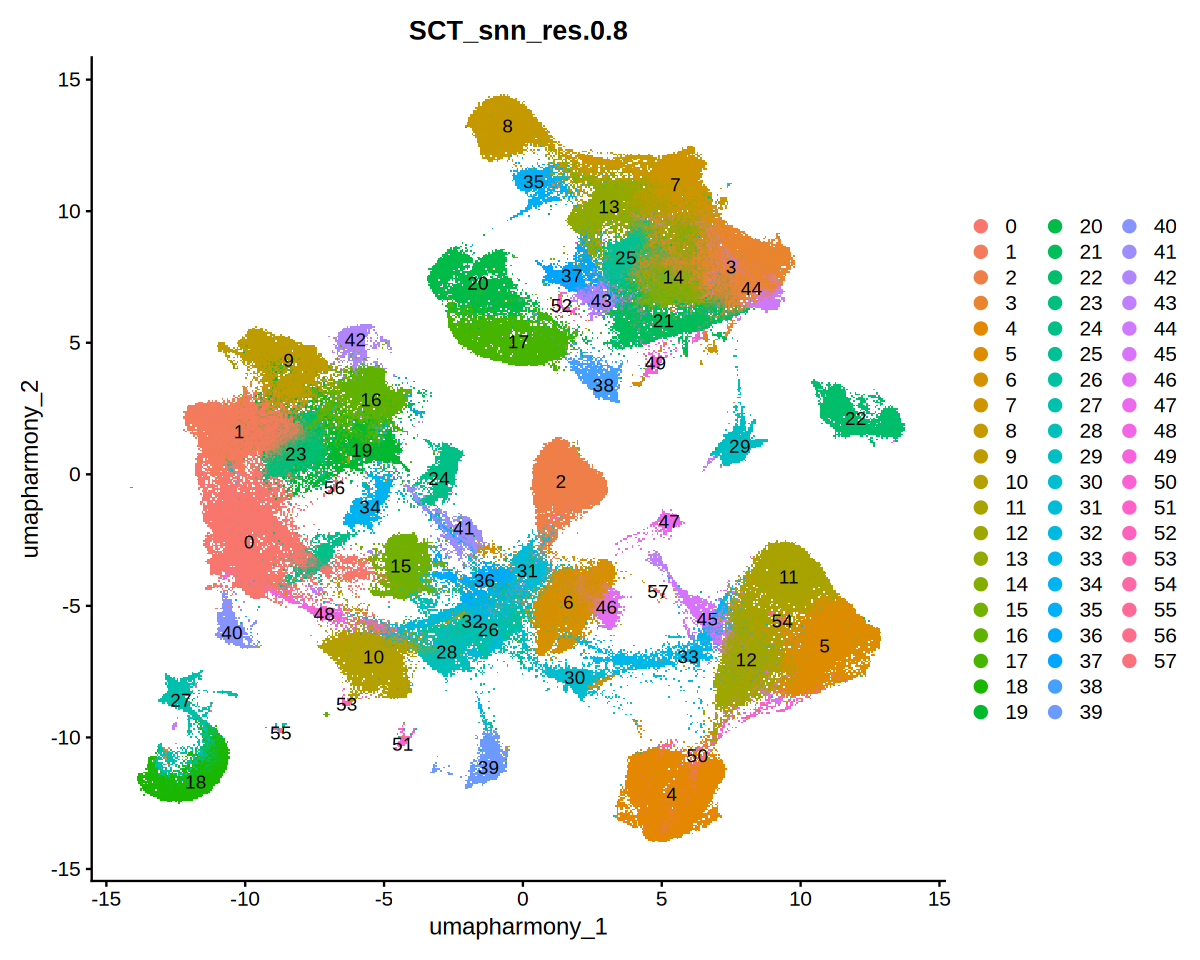

In [65]:
options(repr.plot.width = 10, repr.plot.height = 8)
DimPlot(obj, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.8', label = TRUE)

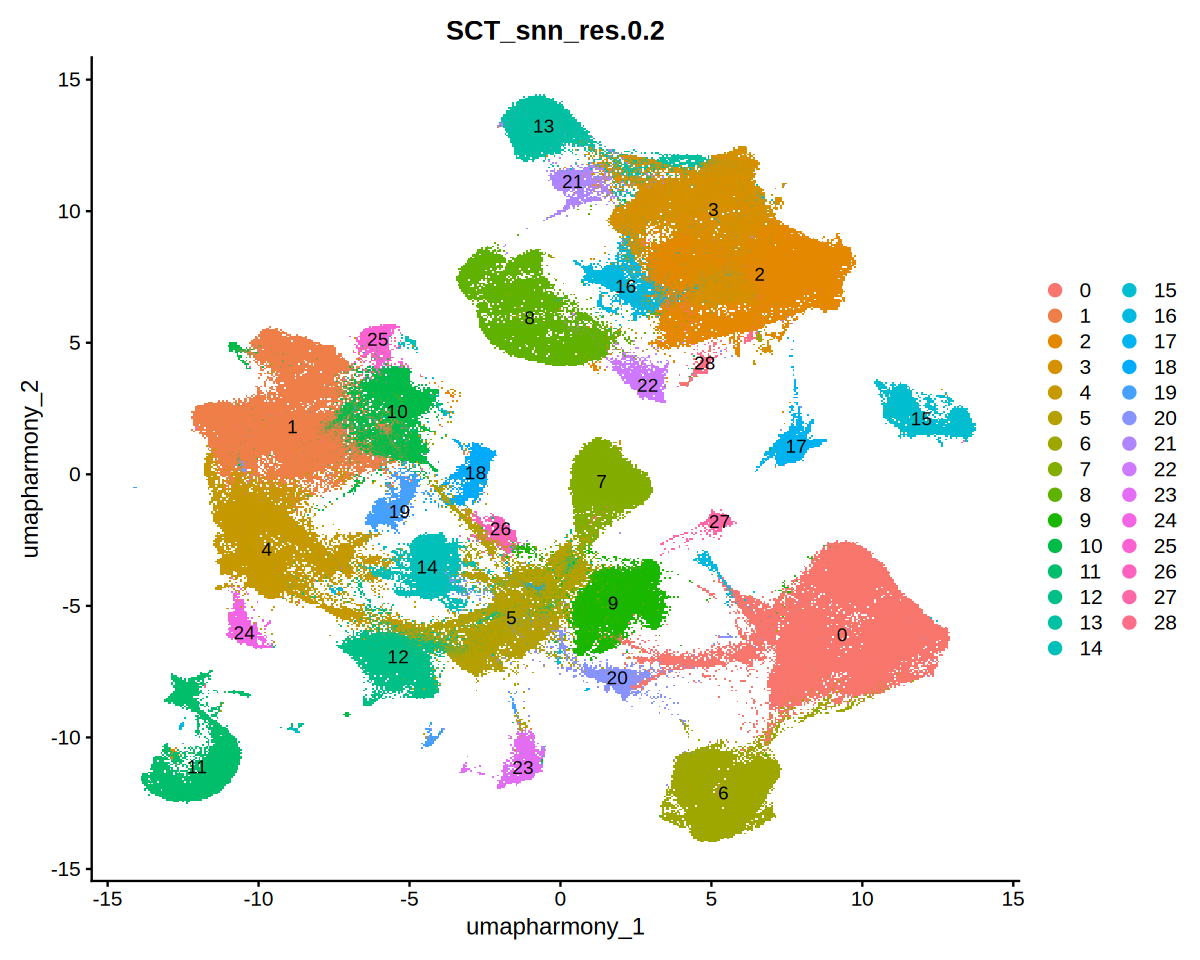

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
p2

Warning message:
“The following requested variables were not found: HLA-DRP5”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



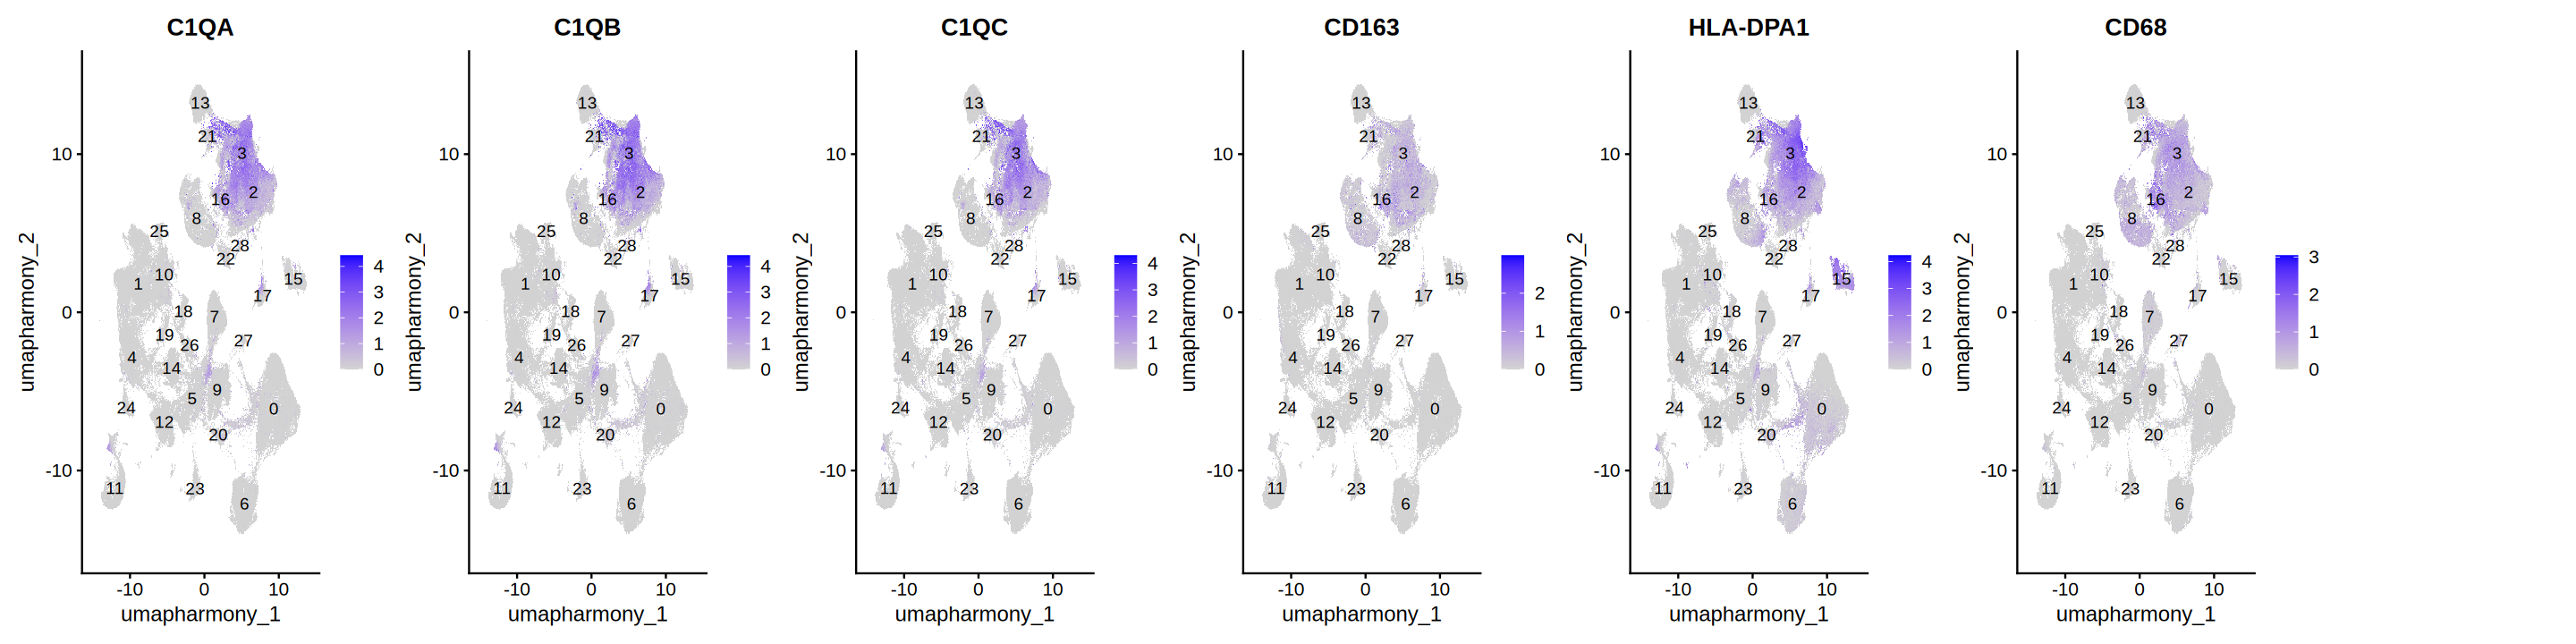

In [34]:
# Get top 6 markers from cluster 16
top_markers <- cluster1$gene[11:15]

# Create feature plots with custom settings
options(repr.plot.width = 24, repr.plot.height = 6)
p3 <- FeaturePlot(obj,
            features = c('C1QA', 'C1QB', 'C1QC', 'CD163', 'HLA-DPA1', 'HLA-DRP5', 'CD68'),
            reduction = "umap.harmony",
            ncol = 7, label = TRUE)
p3

In [109]:
# Create a new object excluding clusters 29 and 30
obj_2_cleaned <- subset(obj_2, idents = c(0:28))

# Verify the number of clusters
print(table(Idents(obj_2_cleaned)))


    0     1    10    11    12    13    14    15    16    17    18    19     2 
47193 44323 16612 12705 11132 10761  9049  6452  6355  5515  5478  5410 33906 
   20    21    22    23    24    25    26    27    28     3     4     5     6 
 3831  3224  2829  2783  2607  2310  1825  1200  1184 23703 21316 21220 19158 
    7     8     9 
18220 17653 16693 


In [36]:
# Range
# top_markers <- cluster1$gene[1:15]
top_markers <- c('C1QA', 'C1QB', 'C1QC', 'CD163', 'HLA-DPA1', 'HLA-DRP5', 'CD68')
# Flatten the markers for DotPlot
markers_genes <- unlist(top_markers)
markers_genes <- make.unique(markers_genes)

# Set factor levels in the order of your original markers vector
markers_genes <- factor(markers_genes, levels = markers_genes)

# Create a mapping from gene -> "Cluster0:Gene" label
label_map <- setNames(
  paste0("Cluster3:", markers_genes),
  markers_genes
)

Warning message:
“The following requested variables were not found: HLA-DRP5”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


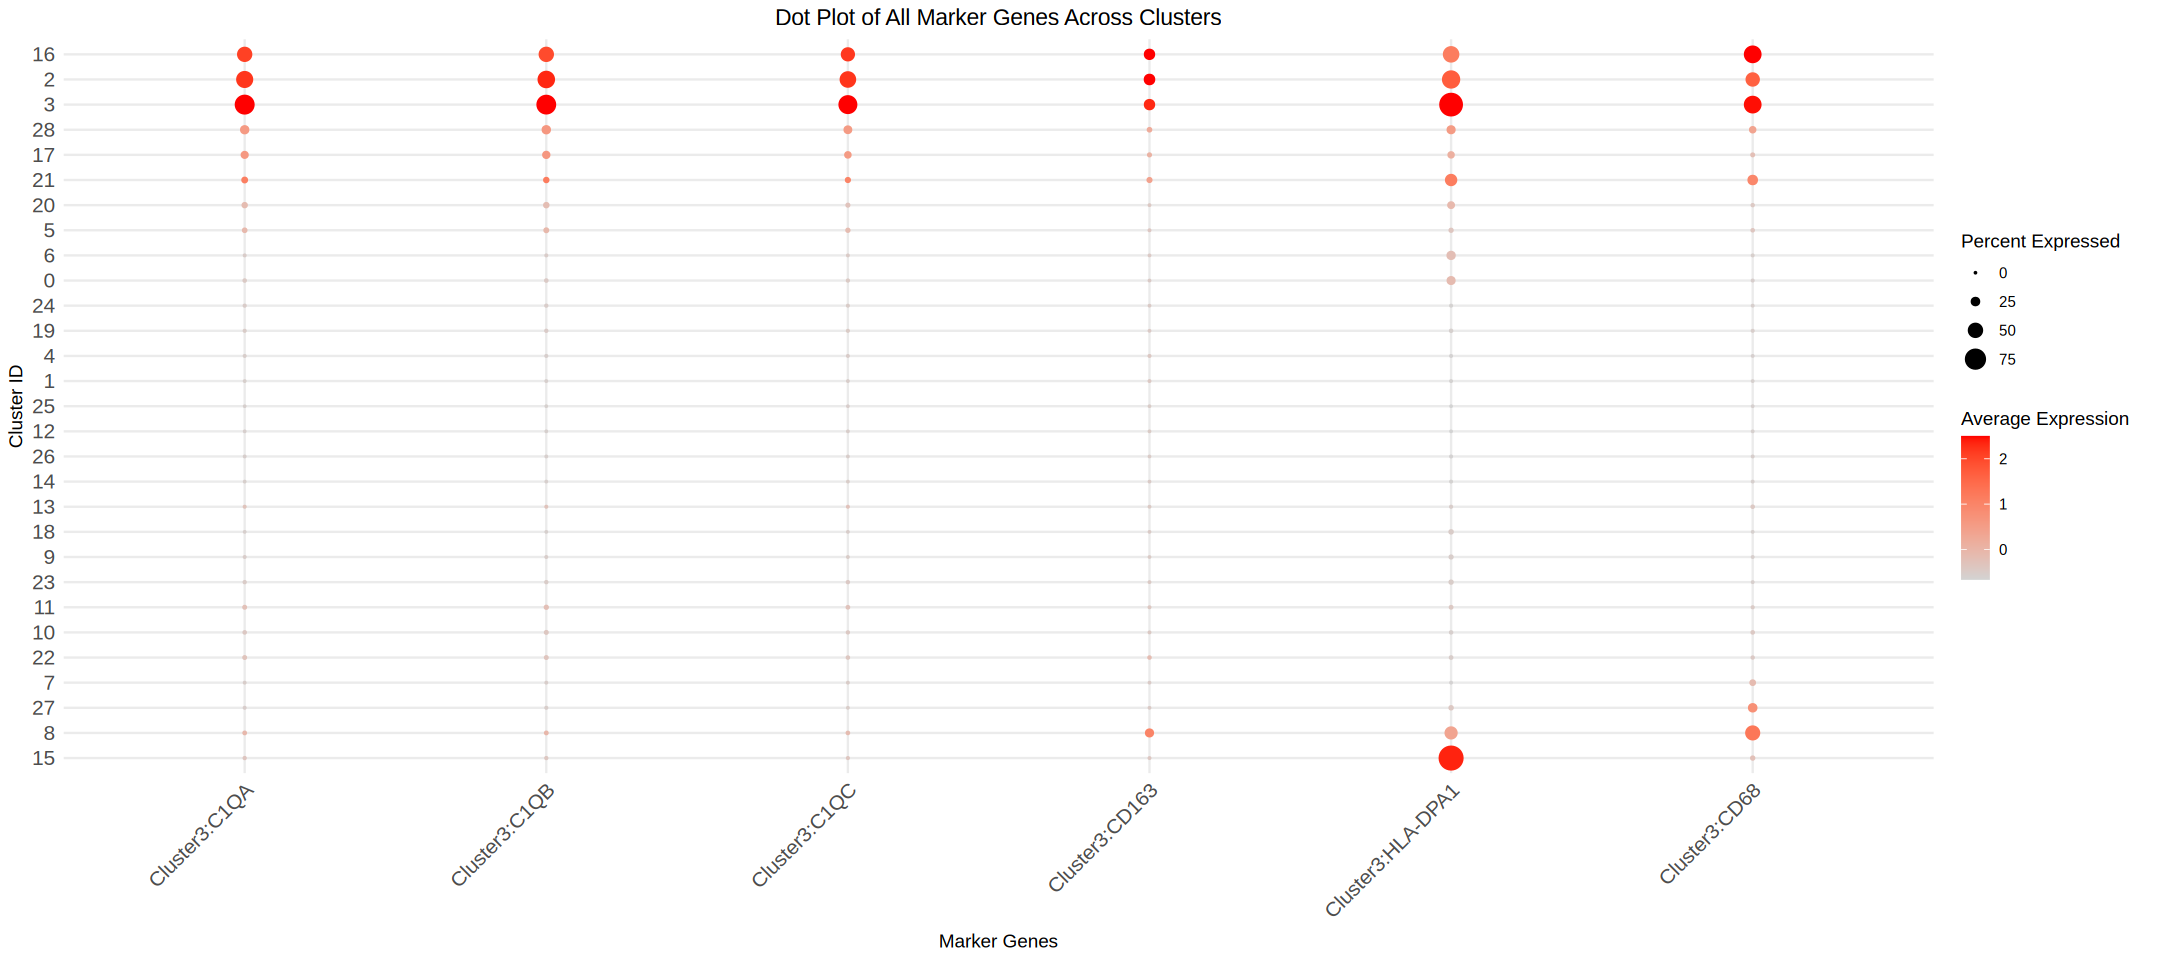

In [37]:
options(repr.plot.width = 18, repr.plot.height = 8)

library(Seurat)
library(ggplot2)

p5 <- DotPlot(obj, features = markers_genes, cluster.idents = TRUE) +
  scale_color_gradient(low = "lightgrey", high = "red") +
  theme_minimal() +
  xlab("Marker Genes") +
  ylab("Cluster ID") +
  ggtitle("Dot Plot of All Marker Genes Across Clusters") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    plot.title  = element_text(hjust = 0.5)
  ) +
  # Override labels so "CD3D" is displayed as "T_cells:CD3D", etc.
  scale_x_discrete(labels = label_map)

# Print the plot
p5

In [19]:
cluster0_genes <- all_markers |> filter(cluster == 0 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster1_genes <- all_markers |> filter(cluster == 1 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster2_genes <- all_markers |> filter(cluster == 2 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster3_genes <- all_markers |> filter(cluster == 3 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster4_genes <- all_markers |> filter(cluster == 4 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster5_genes <- all_markers |> filter(cluster == 5 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster6_genes <- all_markers |> filter(cluster == 6 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster7_genes <- all_markers |> filter(cluster == 7 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster8_genes <- all_markers |> filter(cluster == 8 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster9_genes <- all_markers |> filter(cluster == 9 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster10_genes <- all_markers |> filter(cluster == 10 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster11_genes <- all_markers |> filter(cluster == 11 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster12_genes <- all_markers |> filter(cluster == 12 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster13_genes <- all_markers |> filter(cluster == 13 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster14_genes <- all_markers |> filter(cluster == 14 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster15_genes <- all_markers |> filter(cluster == 15 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 
cluster16_genes <- all_markers |> filter(cluster == 16 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster17_genes <- all_markers |> filter(cluster == 17 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster18_genes <- all_markers |> filter(cluster == 18 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster19_genes <- all_markers |> filter(cluster == 19 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster20_genes <- all_markers |> filter(cluster == 20 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster21_genes <- all_markers |> filter(cluster == 21 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster22_genes <- all_markers |> filter(cluster == 22 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster23_genes <- all_markers |> filter(cluster == 23 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster24_genes <- all_markers |> filter(cluster == 24 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster25_genes <- all_markers |> filter(cluster == 25 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster26_genes <- all_markers |> filter(cluster == 26 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster27_genes <- all_markers |> filter(cluster == 27 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster28_genes <- all_markers |> filter(cluster == 28 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
# cluster29_genes <- all_markers |> filter(cluster == 29 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 
# cluster30_genes <- all_markers |> filter(cluster == 30 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 

In [25]:
# Convert gene symbols to Entrez IDs
entrez_ids <- bitr(
    cluster3_genes,
    fromType = "SYMBOL", 
    toType = "ENTREZID", 
    OrgDb = org.Hs.eg.db)

'select()' returned 1:1 mapping between keys and columns



In [26]:
entrez_ids |> head()

,SYMBOL,ENTREZID
,<chr>,<chr>
1,HLA-DRA,3122
2,AIF1,199
3,TYROBP,7305
4,HLA-DPA1,3113
5,HLA-DRB1,3123
6,HLA-DPB1,3115


In [27]:
# GO enrichment analysis
go_result <- enrichGO(gene = entrez_ids$ENTREZID,
                                         OrgDb = org.Hs.eg.db,
                                         ont = "BP",  # Biological Process
                                         pAdjustMethod = "BH",
                                         pvalueCutoff = 0.05,
                                         qvalueCutoff = 0.05
                                         )

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


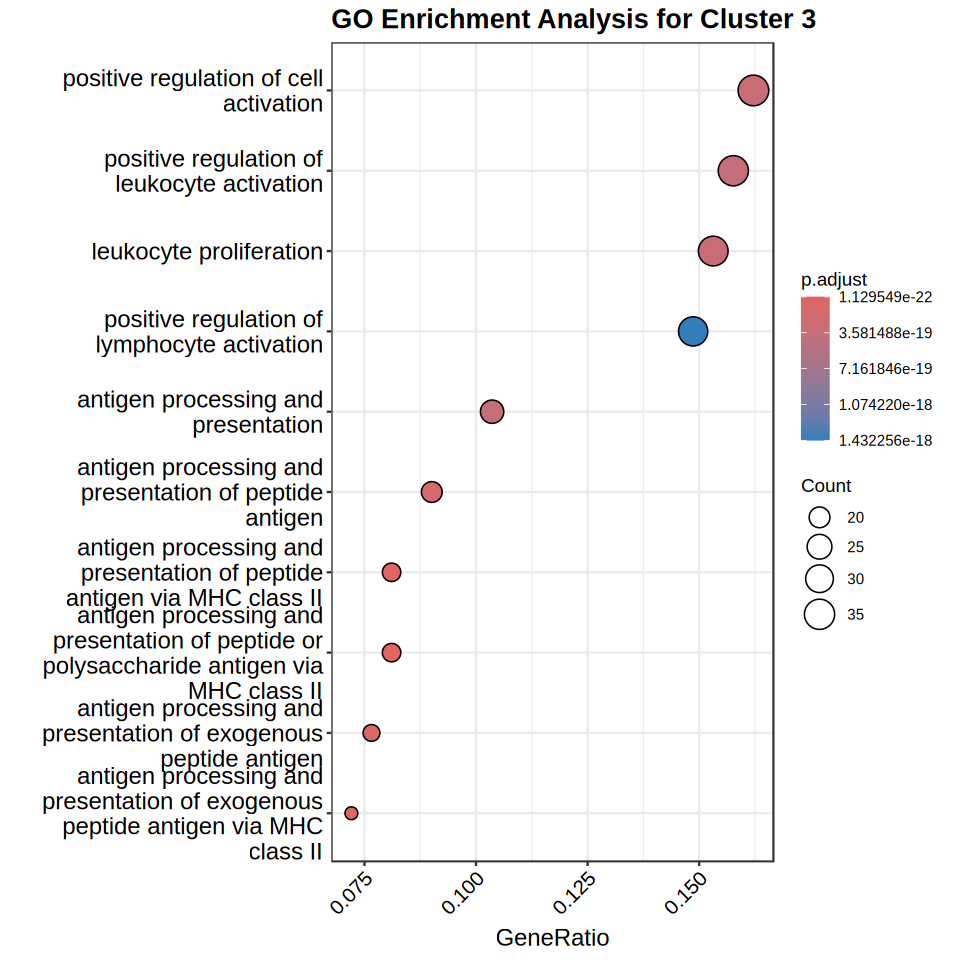

In [28]:
# Visualize GO results
options(repr.plot.width = 8, repr.plot.height = 8)
dotplot(go_result, showCategory = 10) + 
    ggtitle("GO Enrichment Analysis for Cluster 3") +
    theme(plot.title = element_text(size = 16, face = "bold"),
          axis.text.y = element_text(size = 14),
          axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
          axis.title = element_text(size = 14)) +
    scale_size(range = c(3, 8))